In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
import matplotlib.ticker as mtick

In [11]:
#url variables
politician_data_csv_url = "https://raw.githubusercontent.com/willcutchin/bills-for-bills/main/data-sets/politician-trading-data/politician-trading-data-csv/politician-trading-data-BUY2020-final.csv"

#download csv
pol_download = requests.get(politician_data_csv_url).content

In [12]:
#read file to data frame
pol_df = pd.read_csv(io.StringIO(pol_download.decode('utf-8')))

In [13]:
#Drop NA from 12
pol_df = pol_df[pol_df.PERCENT_CHANGE_3_MONTH != '#DIV/0!']
pol_df = pol_df.dropna(subset=['PERCENT_CHANGE_3_MONTH'])
pol_df.head()

,REP_FULLNAME,REP_STATE,REP_TYPE,REP_PARTY,COMPANY_TICKER,COMPANY_CODE,COMPANY_COUNTRY,COMPANY_NAME,TRANSACTION_TYPE,TRANSACTION_DATE,TRANSACTION_PRICE,SHARE_TYPE,TRANSACTION_SHARE_PRICE,TRANSACTION_SHARE_QUANTITY,SHARE_PRICE_3_MONTH,SHARE_PRICE_6_MONTH,SHARE_PRICE_1_YEAR,PERCENT_CHANGE_3_MONTH,PERCENT_CHANGE_6_MONTH,PERCENT_CHANGE_12_MONTH
0,David Roe,TN,Congress,Republican,AAPL,AAPL US,US,Apple Inc,Buy,12/31/2020,8000,Com NPV,132.69,60,122.15,136.33,NaN,-7.94,2.74,NaN
1,David Roe,TN,Congress,Republican,ACN,ACN US,US,Accenture Plc,Buy,12/31/2020,16001,Com A,261.21,60,276.25,296.43,NaN,5.76,13.48,NaN
2,David Roe,TN,Congress,Republican,ADBE,ADBE US,US,Adobe Inc,Buy,12/31/2020,8000,Com,500.12,14,475.37,590.75,NaN,-4.95,18.12,NaN
3,David Roe,TN,Congress,Republican,AEP,AEP US,US,American Electric Power Co Inc,Buy,12/31/2020,8000,Com,83.27,96,84.70,83.93,NaN,1.72,0.79,NaN
4,David Roe,TN,Congress,Republican,AMGN,AMGN US,US,Amgen Inc,Buy,12/31/2020,8000,Com,229.92,34,248.81,242.46,NaN,8.22,5.45,NaN


In [14]:
#create a dataframe where party = republican
pol_df = pol_df.loc[pol_df["REP_PARTY"] == "Republican"]

In [15]:
#group by % change 12 month
pol_df['PERCENT_CHANGE_3_MONTH'] = pd.to_numeric(pol_df['PERCENT_CHANGE_3_MONTH'], downcast="integer")
pol_df['TRANSACTION_SHARE_PRICE'] = pd.to_numeric(pol_df['TRANSACTION_PRICE'], downcast="integer")
pol_df = pol_df.groupby(['REP_FULLNAME']).agg({"TRANSACTION_PRICE": "sum", "PERCENT_CHANGE_3_MONTH":"mean"}).reset_index()
pol_df.head()

,REP_FULLNAME,TRANSACTION_PRICE,PERCENT_CHANGE_3_MONTH
0,Adam Kinzinger,88000,7.075455
1,Addison Mcconnell,24000,8.956667
2,Anthony Gonzales,8000,13.720000
3,Austin Scott,129000,130.095000
4,Brian Mast,211000,26.207500


In [16]:
#create a column titled dollar return that takes the summed transaction costs multipled by the % returns
pol_df["DECIMAL_CHANGE_2020"] = (pol_df.PERCENT_CHANGE_3_MONTH/100)
pol_df["NOMINAL_GAINS_2020"] = pol_df.TRANSACTION_PRICE * pol_df["DECIMAL_CHANGE_2020"]
pol_df.head()

,REP_FULLNAME,TRANSACTION_PRICE,PERCENT_CHANGE_3_MONTH,DECIMAL_CHANGE_2020,NOMINAL_GAINS_2020
0,Adam Kinzinger,88000,7.075455,0.070755,6226.400
1,Addison Mcconnell,24000,8.956667,0.089567,2149.600
2,Anthony Gonzales,8000,13.720000,0.137200,1097.600
3,Austin Scott,129000,130.095000,1.300950,167822.550
4,Brian Mast,211000,26.207500,0.262075,55297.825


In [17]:
#sort by top 10
pol_df = pol_df.sort_values(by=['NOMINAL_GAINS_2020'], ascending=False)
pol_df = pol_df.head(10)
pol_df

,REP_FULLNAME,TRANSACTION_PRICE,PERCENT_CHANGE_3_MONTH,DECIMAL_CHANGE_2020,NOMINAL_GAINS_2020
38,Michael Mccaul,75209219,9.080511,0.090805,6.829382e+06
22,Gregory Gianforte,10456010,23.975174,0.239752,2.506847e+06
31,Kelly Loeffler,5098001,18.614286,0.186143,9.489565e+05
15,David Roe,10017041,6.117172,0.061172,6.127597e+05
35,Mark Green,12215025,3.223839,0.032238,3.937927e+05
14,David Perdue,2334011,13.109255,0.131093,3.059715e+05
7,Charles Roberts,2578504,9.817927,0.098179,2.531556e+05
33,Kenny Marchant,2342026,10.053494,0.100535,2.354554e+05
32,Kenneth Conaway,3484012,5.759861,0.057599,2.006743e+05
18,Francis Rooney,1573500,11.427667,0.114277,1.798143e+05


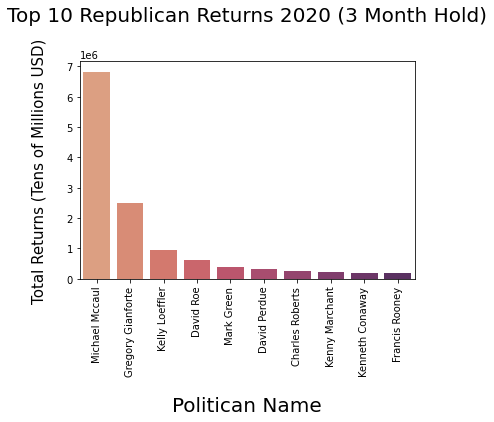

In [18]:
#graph the bar chart
palette = sns.color_palette("flare",10)
ax=sns.barplot(x=pol_df["REP_FULLNAME"],y=pol_df["NOMINAL_GAINS_2020"],palette=palette)
ax.set_xlabel("Politican Name",fontsize=20,labelpad=20)
ax.set_ylabel("Total Returns (Tens of Millions USD)",fontsize=15,labelpad=20)
ax.set_title("Top 10 Republican Returns 2020 (3 Month Hold)", fontsize=20, pad=40)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=10)
plt.savefig('bfb_visualization_4_THREE_REP_bar')